In this dataset we have to predict the income of people that they earn more than 50k or less than 50k

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [78]:
df=pd.read_csv("adult_income.csv", sep=',\s')
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [79]:
df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [80]:
df.shape

(32560, 15)

In [81]:
df.isnull().values.any()

False

Observation

here we see there are no null values but there is a '?' present in our data set which is treated as null value

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [83]:
df=df.replace('?', np.nan)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [84]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Observations
1. There are 1836 null values present in workclass column
2. 1843 null values present in occupation 
3. 583 null values present in native_country

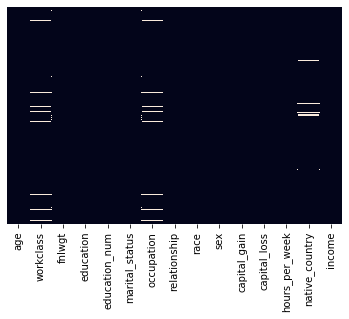

In [85]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [87]:
#imputing missing values with mode

for col in ['workclass', 'occupation', 'native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [88]:
df.isnull().values.any()

False

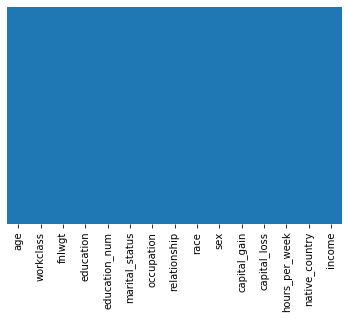

In [89]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='tab20')
plt.show()

# Visualization

In [90]:
df=pd.DataFrame(df)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [91]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [92]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Observation

Numeric features
Numeric features  = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

Categorical features

Categorical features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

For analyzing the data with target i.e income we have to change income into numeric type

In [93]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})
df['income'].dtypes

dtype('int64')

In [94]:
df['income'].unique()

array([0, 1], dtype=int64)

Observation 

Here 1 stands for greater than 50k and 0 stands for less than equal to 50k

# Summary Statistics

In [95]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Observatioon

1. Minimum age is 17 years and maximum age is 90 years in our data set.

2. Minimum education_num is 1 and maximum is 16

3. Minimum hours_per_week is 1 and maximum is 99 hours_per_week

4. In age, fnlwgt, education_num, capital_loss attributes mean is greater than median therefore in these attributes data is right skewed.

5. Difference between 75% and max is higher in age, fnlwgt, capital-gain, capital_loss and hours_per_week therefore outliersd present in these column which we have to remove it.

# Exploring Data Variables

In [96]:
# printing the object data types and their unique values

for column in df.columns:
    if df[column].dtype==object:
        print(str(column) + ' : ' +str(df[column].unique()))
        print(df[column].value_counts())
        print('*********************************************************')
        print('\n')

workclass : ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
*********************************************************


education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
***********

# To check correlation

In [97]:
df_cor=df.corr()
df_cor

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


Here we can see the correlatoin between the columns

For better understanding we can see it via visualization (with help of heatmap)

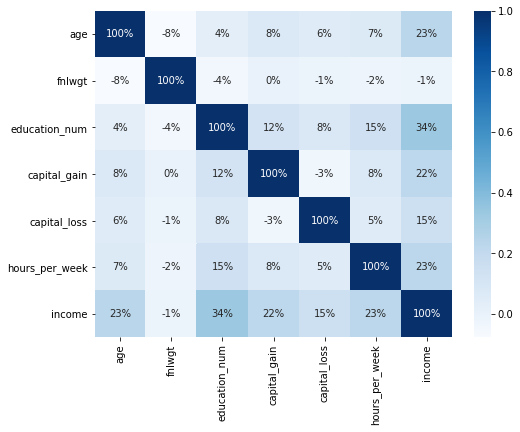

In [98]:
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt='.0%', cmap='Blues')
plt.show()

Text(0.5, 1.0, 'Correlation with target variable')

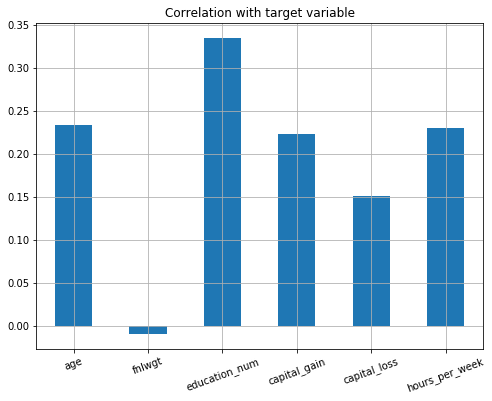

In [99]:
plt.figure(figsize=(8,6))
df.drop('income', axis=1).corrwith(df['income']).plot(kind='bar', grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with target variable")

Observation

1. fnlwgt is only negetively correlated with target variable income

2. education number is highly correlated with target variable among all input variables.

# Data Visualization

Our feature variable of interest is income

It refers to the monthly income of the people

We already change it integer valued as it contains only two number 0 and 1

1 stands for greater than 50k

0 stands for less than equal to 50k

# Univariate Analysis

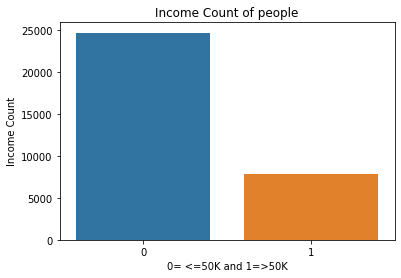

0    24719
1     7841
Name: income, dtype: int64


In [100]:
#Checking income count of people
plt.subplots(figsize=(6, 4))
sns.countplot(x='income', data=df)
plt.title("Income Count of people")
plt.xlabel('0= <=50K and 1=>50K')
plt.ylabel("Income Count")
plt.show()

print(df.income.value_counts())

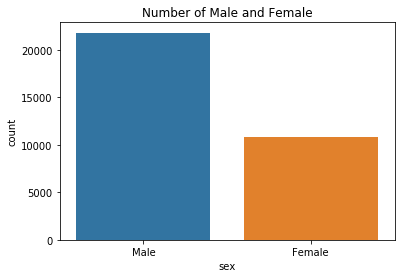

Male      21789
Female    10771
Name: sex, dtype: int64


In [101]:
#Checking number of male and female
plt.subplots(figsize=(6,4))
sns.countplot(x="sex", data=df)
plt.title("Number of Male and Female")
plt.show()

print(df.sex.value_counts())

Observation

there are 21789 male and 10771 female

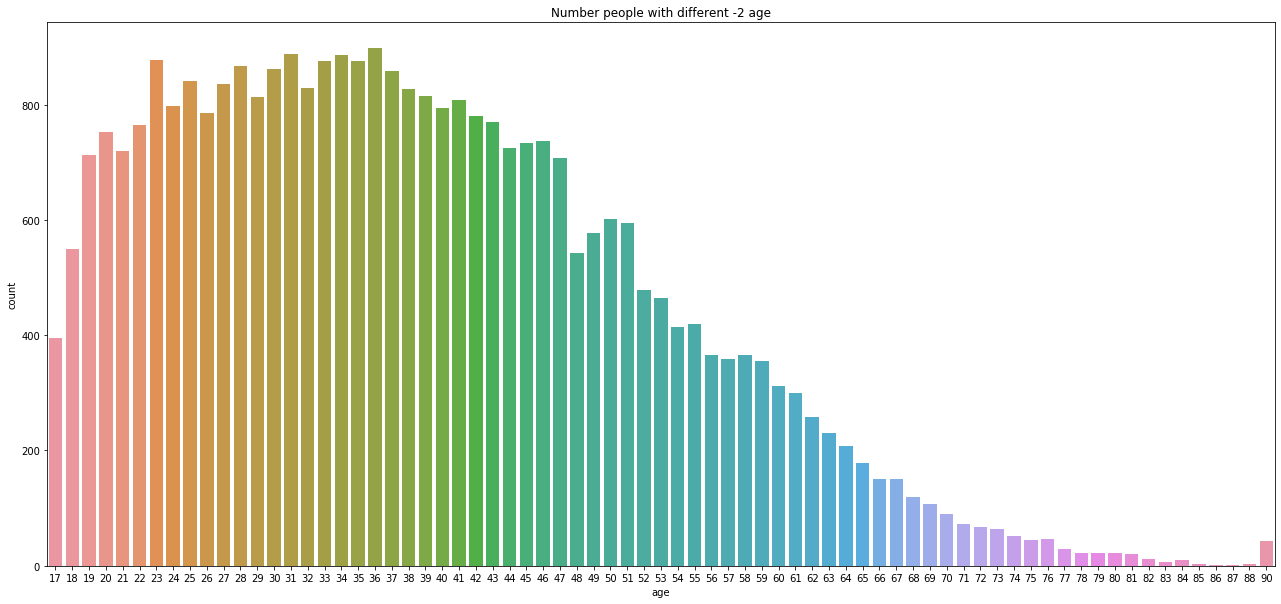

In [102]:
#Checkng number of people with different 2 age group

plt.subplots(figsize=(22, 10))
sns.countplot(x='age', data=df)
plt.title("Number people with different -2 age")
plt.show()

In [103]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Observation

1.Maximum people is age of 36 tears i.e 898.

2.Only one people is age of 86 and 87 years.

3.there are 43 people of age 90 years which is highest age group of our data set.

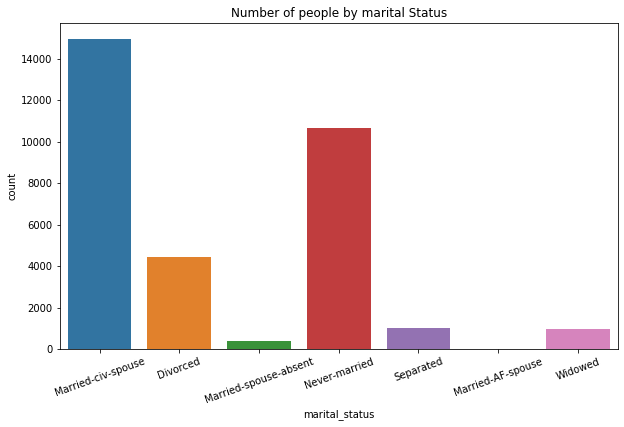

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64


In [106]:
#Marital_status of people
plt.subplots(figsize=(10,6))
sns.countplot(x='marital_status', data=df)
plt.title("Number of people by marital Status")
plt.xticks(rotation=20)
plt.show()

print(df.marital_status.value_counts())

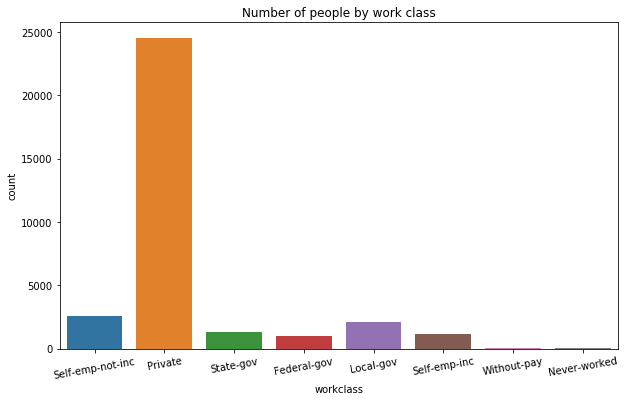

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [107]:
#work class of people 
plt.subplots(figsize=(10,6))
sns.countplot(x="workclass", data=df)
plt.title("Number of people by work class")
plt.xticks(rotation=10)
plt.show()

print(df.workclass.value_counts())

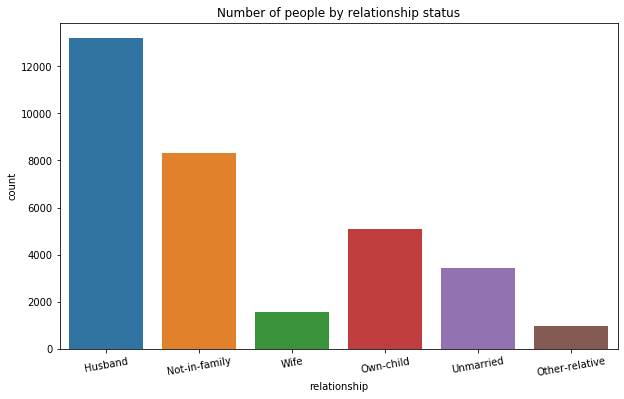

Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [112]:
#Relationship status of people
plt.subplots(figsize=(10,6))
sns.countplot(x="relationship", data=df)
plt.title("Number of people by relationship status")
plt.xticks(rotation=10)
plt.show()

print(df.relationship.value_counts())

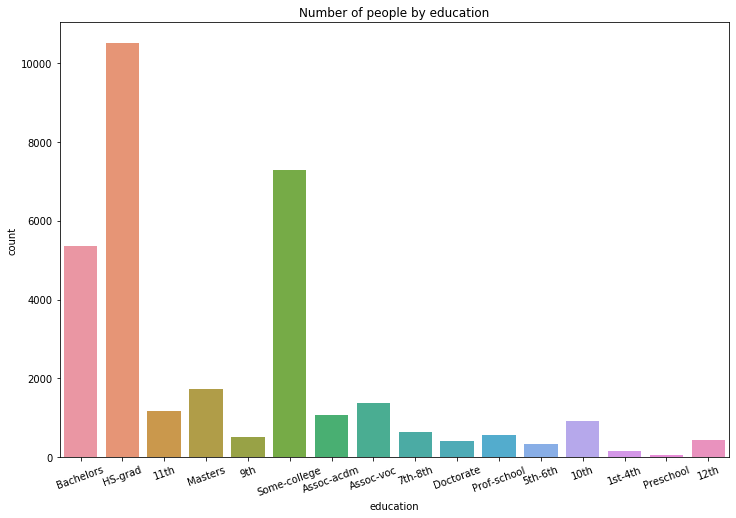

HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


In [117]:
#Checking the number of people by education
plt.subplots(figsize=(12, 8))
sns.countplot(x='education', data=df)
plt.title("Number of people by education")
plt.xticks(rotation=20)
plt.show()

print(df.education.value_counts())

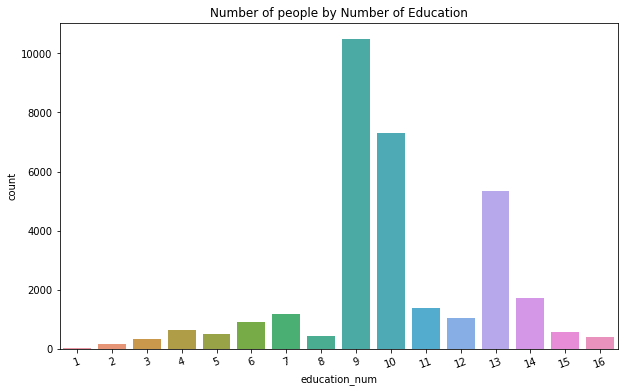

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64


In [121]:
#checking the number of people by education number
plt.subplots(figsize=(10, 6))
sns.countplot(x='education_num', data=df)
plt.title("Number of people by Number of Education")
plt.xticks(rotation=20)
plt.show()

print(df.education_num.value_counts())

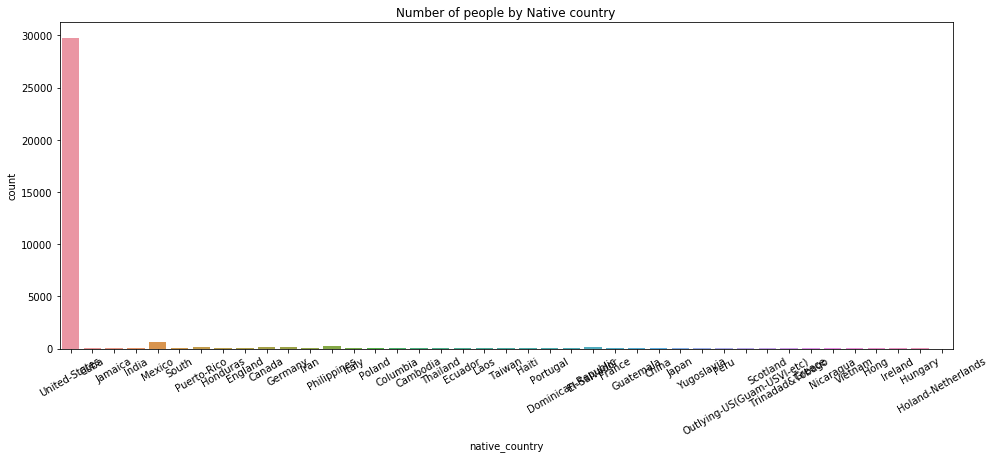

United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [124]:
#checking the number of people by native country
plt.subplots(figsize=(16,6))
sns.countplot(x='native_country', data=df)
plt.title("Number of people by Native country")
plt.xticks(rotation=30)
plt.show()

print(df.native_country.value_counts())

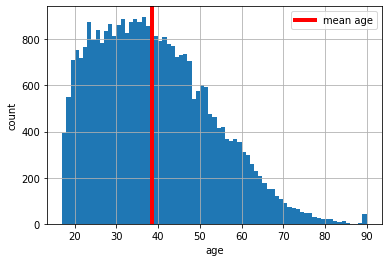

In [129]:
#Checking the mean of age group

ages=df['age'].hist(bins=max(df['age']-min(df['age'])))
mean_val = np.mean(df['age'])
plt.axvline(mean_val, linewidth=4, color='red', label='mean age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

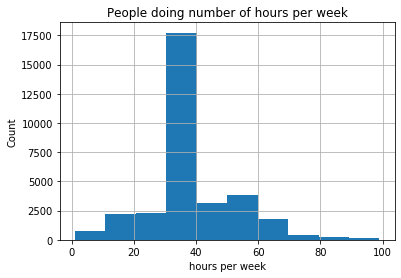

In [130]:
#Checking number of hours per week
df['hours_per_week'].hist()
plt.xlabel('hours per week')
plt.ylabel('Count')
plt.title("People doing number of hours per week")
plt.show()

Observation

Approx. 17500 people doing 30 to 40 hours per week

# Bivariate Analysis

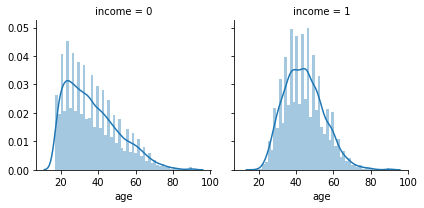

In [131]:
#Exploring Age vs Income via FaceGrid
facet=sns.FacetGrid(df, col='income')
facet.map(sns.distplot, 'age')
plt.show()

# Sex vs Income

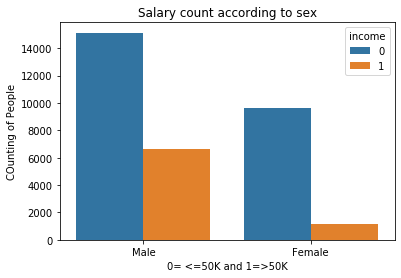

sex     income
Female  0          9592
        1          1179
Male    0         15127
        1          6662
Name: income, dtype: int64


In [132]:
sns.countplot(x="sex", hue='income', data=df)
plt.title("Salary count according to sex")
plt.xlabel("0= <=50K and 1=>50K")
plt.ylabel('COunting of People')
plt.show()

print(df.groupby('sex')['income'].value_counts())

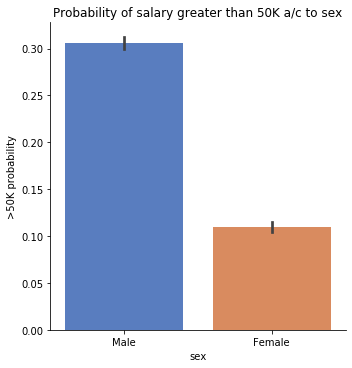

In [136]:
#factor plot of sex vs income
sns.factorplot(x="sex", y="income", data=df, kind="bar", size=5, palette="muted", aspect=1)
plt.title("Probability of salary greater than 50K a/c to sex")
plt.ylabel(">50K probability")
plt.show()

Findings

Only 30% male and 11% female got salary more than 50k

# Education vs Income

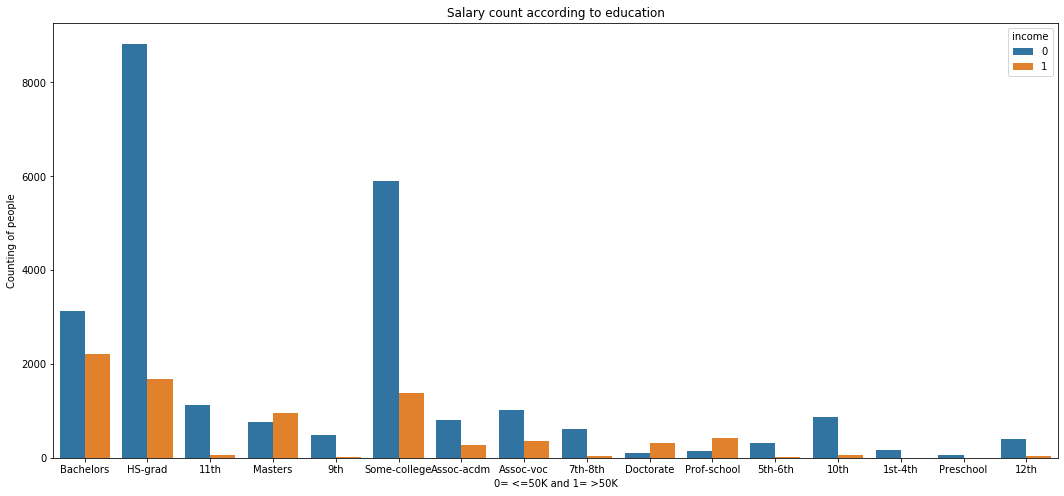

education     income
10th          0          871
              1           62
11th          0         1115
              1           60
12th          0          400
              1           33
1st-4th       0          162
              1            6
5th-6th       0          317
              1           16
7th-8th       0          606
              1           40
9th           0          487
              1           27
Assoc-acdm    0          802
              1          265
Assoc-voc     0         1021
              1          361
Bachelors     0         3133
              1         2221
Doctorate     1          306
              0          107
HS-grad       0         8826
              1         1675
Masters       1          959
              0          764
Preschool     0           51
Prof-school   1          423
              0          153
Some-college  0         5904
              1         1387
Name: income, dtype: int64


In [137]:
plt.subplots(figsize=(18,8))
sns.countplot(x="education", hue="income", data=df)
plt.title("Salary count according to education")
plt.xlabel("0= <=50K and 1= >50K")
plt.ylabel('Counting of people')
plt.show()

print(df.groupby('education')['income'].value_counts())

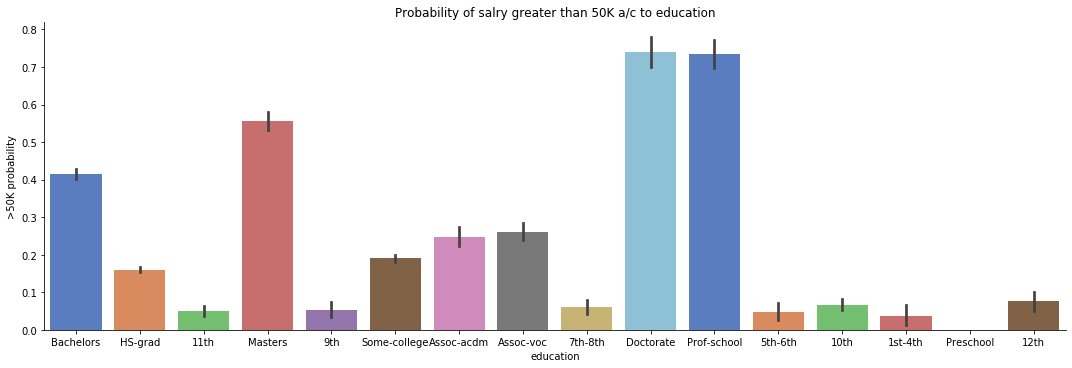

In [138]:
#Factorplot of education vs income

sns.factorplot(x="education", y="income", data=df, kind="bar", size=5, palette="muted", aspect=3)
plt.title("Probability of salry greater than 50K a/c to education")
plt.ylabel(">50K probability")
plt.show()

Findings

Approximately 75% Doctorate and Prof - school professional got salary more than 50k.

# Education_Num vs Income

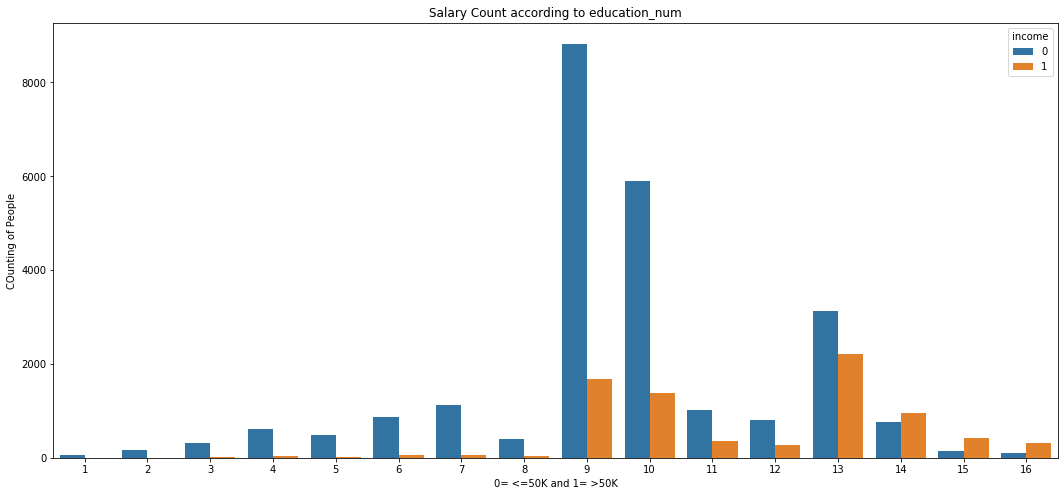

education_num  income
1              0           51
2              0          162
               1            6
3              0          317
               1           16
4              0          606
               1           40
5              0          487
               1           27
6              0          871
               1           62
7              0         1115
               1           60
8              0          400
               1           33
9              0         8826
               1         1675
10             0         5904
               1         1387
11             0         1021
               1          361
12             0          802
               1          265
13             0         3133
               1         2221
14             1          959
               0          764
15             1          423
               0          153
16             1          306
               0          107
Name: income, dtype: int64


In [141]:
plt.subplots(figsize=(18, 8))
sns.countplot(x="education_num", hue='income', data=df)
plt.title("Salary Count according to education_num")
plt.xlabel('0= <=50K and 1= >50K')
plt.ylabel("COunting of People")
plt.show()

print(df.groupby('education_num')['income'].value_counts())

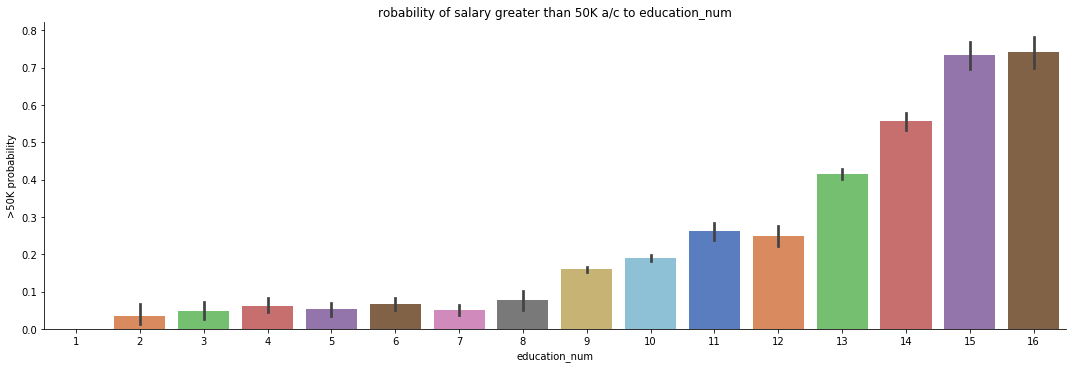

In [142]:
#Factor plot for education and income
sns.factorplot(x="education_num", y="income", data=df, kind="bar", size=5, palette="muted", aspect=3)
plt.title("robability of salary greater than 50K a/c to education_num")
plt.ylabel(">50K probability")
plt.show()

# Relationship Vs Income

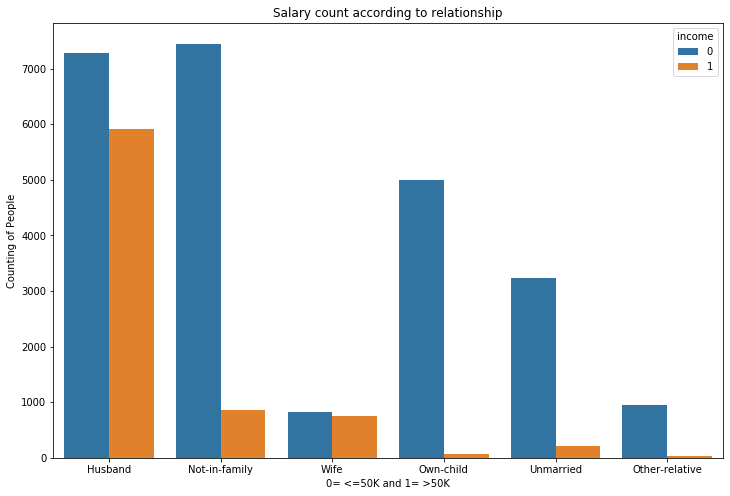

relationship    income
Husband         0         7275
                1         5918
Not-in-family   0         7448
                1          856
Other-relative  0          944
                1           37
Own-child       0         5001
                1           67
Unmarried       0         3228
                1          218
Wife            0          823
                1          745
Name: income, dtype: int64


In [146]:
plt.subplots(figsize=(12, 8))
sns.countplot(x="relationship", hue="income", data=df)
plt.title("Salary count according to relationship")
plt.xlabel("0= <=50K and 1= >50K")
plt.ylabel("Counting of People")
plt.show()

print(df.groupby("relationship")['income'].value_counts())

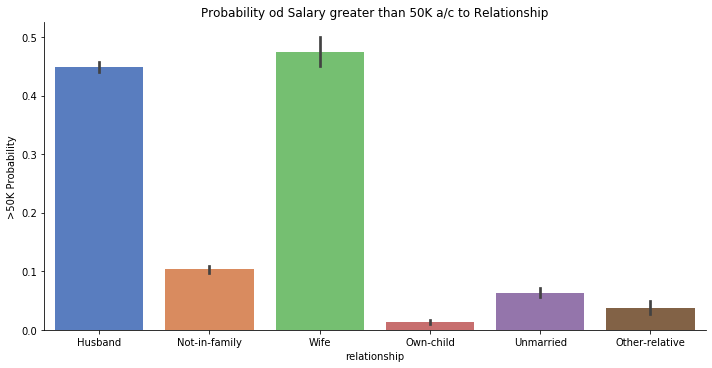

In [147]:
sns.factorplot(x="relationship", y="income", data=df, kind="bar", size=5, palette="muted", aspect=2)
plt.title("Probability od Salary greater than 50K a/c to Relationship")
plt.ylabel(">50K Probability")
plt.show()

# Worlclass vs Income

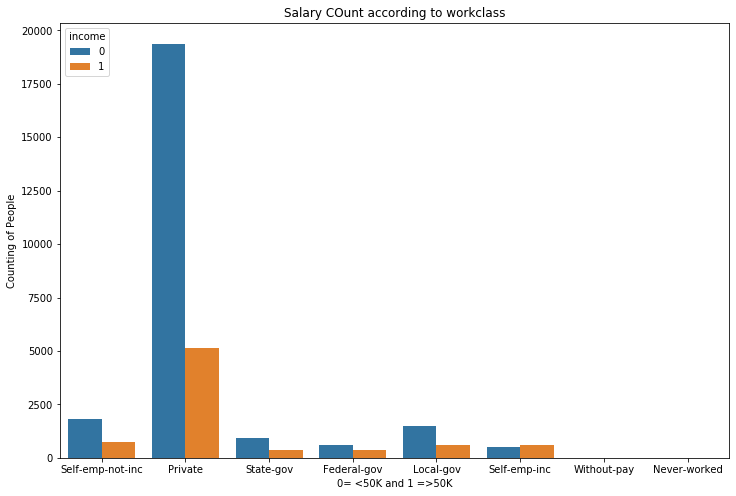

workclass         income
Federal-gov       0           589
                  1           371
Local-gov         0          1476
                  1           617
Never-worked      0             7
Private           0         19378
                  1          5154
Self-emp-inc      1           622
                  0           494
Self-emp-not-inc  0          1817
                  1           724
State-gov         0           944
                  1           353
Without-pay       0            14
Name: income, dtype: int64


In [148]:
plt.subplots(figsize=(12, 8))
sns.countplot(x="workclass", hue='income', data=df)
plt.title("Salary COunt according to workclass")
plt.xlabel("0= <50K and 1 =>50K")
plt.ylabel('Counting of People')
plt.show()

print(df.groupby('workclass')['income'].value_counts())

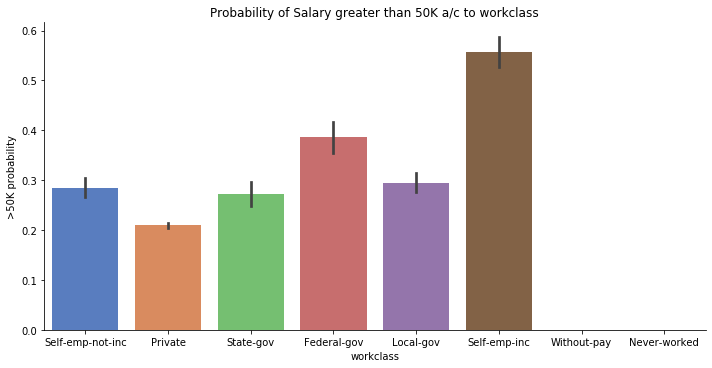

In [150]:
sns.factorplot(x="workclass", y="income", data=df, kind="bar", size=5, palette="muted", aspect=2)
plt.title("Probability of Salary greater than 50K a/c to workclass")
plt.ylabel(">50K probability")
plt.show()

Findings

55% of self emp inc salary more than 50k.

# Native Country vs Income

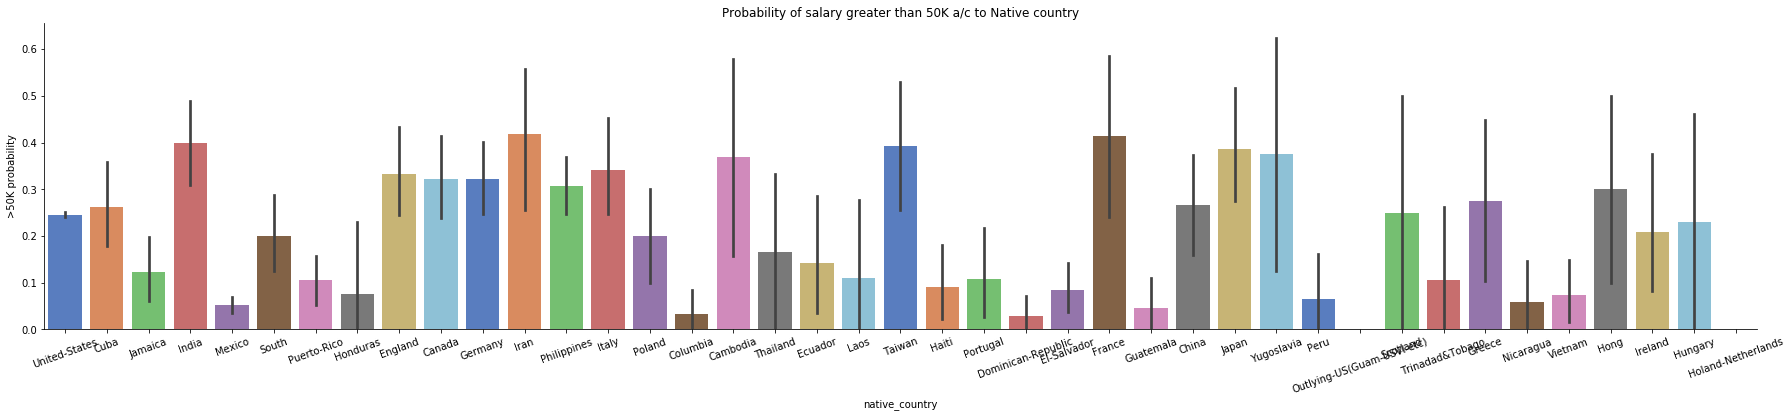

In [151]:
sns.factorplot(x="native_country", y="income", data=df, kind="bar", size=5, palette="muted", aspect=5)
plt.title("Probability of salary greater than 50K a/c to Native country")
plt.xticks(rotation=20)
plt.ylabel(">50K probability")
plt.show()

# Multivariate Analysis

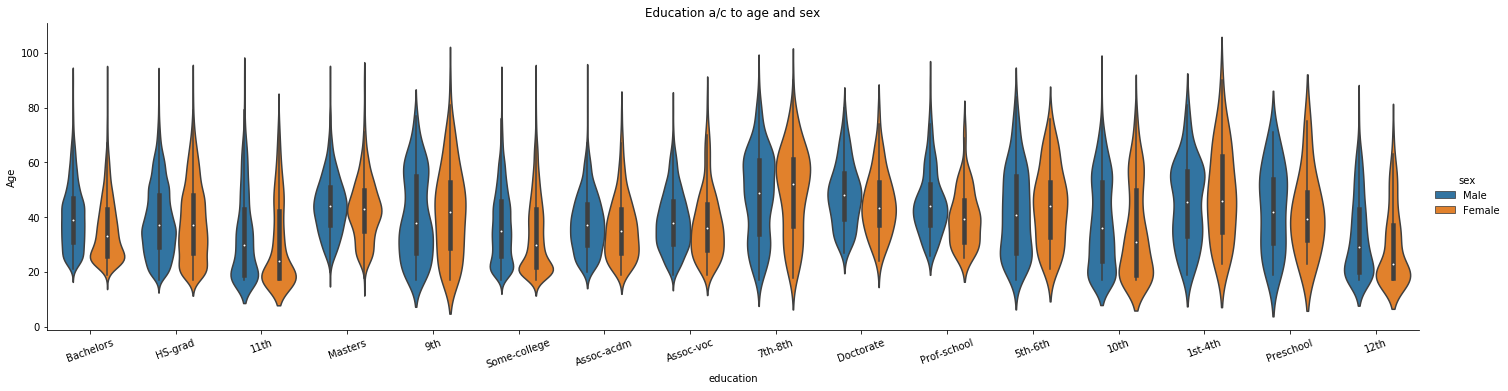

In [155]:
sns.factorplot(x="education", y="age", hue="sex", data=df, kind="violin", size=5, plette="muted", aspect=4)
plt.title("Education a/c to age and sex")
plt.xticks(rotation=20)
plt.ylabel("Age")
plt.show()

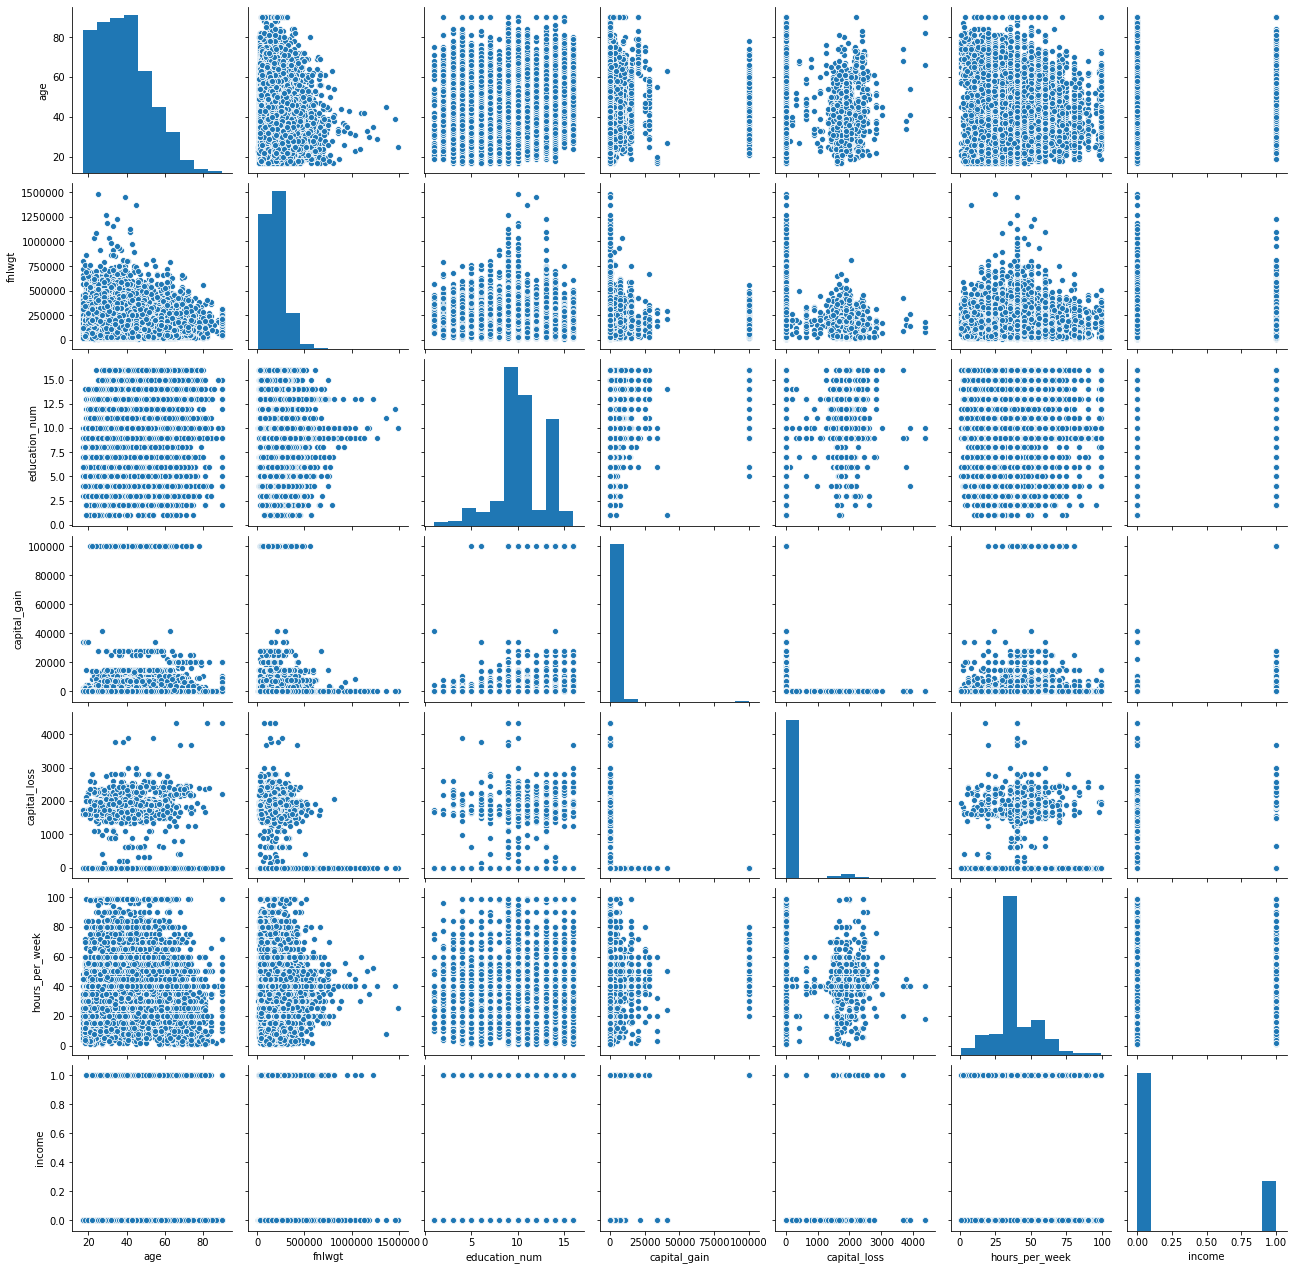

In [158]:
sns.pairplot(df)

# Checking Skewness

In [159]:
df.skew()

age                0.558738
fnlwgt             1.446972
education_num     -0.311630
capital_gain      11.953690
capital_loss       4.594549
hours_per_week     0.227636
income             1.212383
dtype: float64

In [161]:
#Treating skewness via square root method and cube root method
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.cbrt(df[col])

In [162]:
df.skew()

age               0.204335
fnlwgt            0.189066
education_num    -0.311630
capital_gain      5.894949
capital_loss      4.376279
hours_per_week    0.227636
income            1.212383
dtype: float64

# Converting the categorical data into numeric variables

In [164]:
#Transform non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [165]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,7.071068,5,288.636450,9,12,2,3,0,4,1,0.0,0.0,12,38,0.0
1,6.164414,3,464.377002,11,8,0,5,1,4,1,0.0,0.0,39,38,0.0
2,7.280110,3,484.480134,1,6,2,5,0,2,1,0.0,0.0,39,38,0.0
3,5.291503,3,581.729318,9,12,2,9,5,2,0,0.0,0.0,39,4,0.0
4,6.082763,3,533.462276,12,13,2,3,5,4,0,0.0,0.0,39,38,0.0


# Plotting Outliers

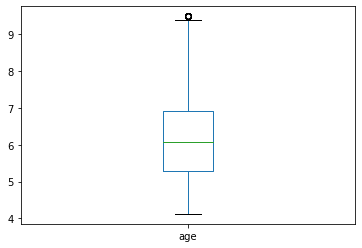

In [166]:
df['age'].plot.box()

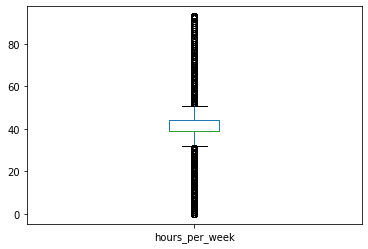

In [167]:
df['hours_per_week'].plot.box()

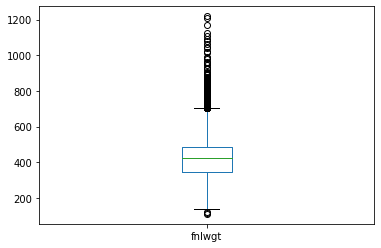

In [168]:
df['fnlwgt'].plot.box()

# Removing Outliers

In [169]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.87717289, 1.72133587, 1.08850574, ..., 2.25444135, 0.26137428,
        0.5632099 ],
       [0.04529753, 0.08522344, 0.3801927 , ..., 0.03112222, 0.26137428,
        0.5632099 ],
       [1.06897372, 0.08522344, 0.54819853, ..., 0.03112222, 0.26137428,
        0.5632099 ],
       ...,
       [1.3769523 , 0.08522344, 0.24342694, ..., 0.03112222, 0.26137428,
        0.5632099 ],
       [1.30712916, 0.08522344, 0.2506509 , ..., 1.67802528, 0.26137428,
        0.5632099 ],
       [1.00565793, 0.81805622, 0.98367672, ..., 0.03112222, 0.26137428,
        1.77553698]])

In [170]:
threshold=3
print(np.where(z>3))

(array([    3,     7,     9, ..., 32550, 32552, 32559], dtype=int64), array([13, 10, 12, ...,  8,  8, 10], dtype=int64))


In [171]:
dfnew=df[(z<3).all(axis=1)]

In [172]:
#checking shape

print(df.shape, '\t\t', dfnew.shape)

(32560, 15) 		 (27561, 15)


In [173]:
df=dfnew
df.shape

(27561, 15)

# Model Training

In [174]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,7.071068,5,288.636450,9,12,2,3,0,4,1,0.0,0.0,12,38,0.0
1,6.164414,3,464.377002,11,8,0,5,1,4,1,0.0,0.0,39,38,0.0
2,7.280110,3,484.480134,1,6,2,5,0,2,1,0.0,0.0,39,38,0.0
4,6.082763,3,533.462276,12,13,2,3,5,4,0,0.0,0.0,39,38,0.0
5,7.000000,3,400.233682,6,4,3,7,1,2,0,0.0,0.0,15,22,0.0


In [175]:
#Splitting data into input and output variable
x=df.drop(columns=['income'], axis=1)
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,7.071068,5,288.636450,9,12,2,3,0,4,1,0.0,0.0,12,38
1,6.164414,3,464.377002,11,8,0,5,1,4,1,0.0,0.0,39,38
2,7.280110,3,484.480134,1,6,2,5,0,2,1,0.0,0.0,39,38
4,6.082763,3,533.462276,12,13,2,3,5,4,0,0.0,0.0,39,38
5,7.000000,3,400.233682,6,4,3,7,1,2,0,0.0,0.0,15,22


In [176]:
y=df['income']
y.head()

0    0.0
1    0.0
2    0.0
4    0.0
5    0.0
Name: income, dtype: float64

In [177]:
#checking the shape of input and target variable
print(x.shape, '\t\t', y.shape)

(27561, 14) 		 (27561,)


In [178]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [179]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=42, stratify=y)

In [180]:
#Checking the shape

print(x_train.shape, '\t\t', x_test.shape)

(22048, 14) 		 (5513, 14)


In [182]:
#Checking the shape

print(y_train.shape, '\t\t', y_test.shape)

(22048,) 		 (5513,)


In [185]:
#Importing all the model liobrary

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

# Finding the best parameters

In [187]:
#Using GridSearchCV to find out the best parameter in KNeighborsClassisifier

parameters={'C':[1, 10], 'random_state': range(42, 100)}
lg=LogisticRegression()

clf=GridSearchCV(lg, parameters)
clf.fit(x, y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [188]:
#Using GridsearchCV to find out the best parameter in KNeighborsClassifier

parameters={'n_neighbors':range(22, 25)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn, parameters)
clf.fit(x, y)
print(clf.best_params_)

{'n_neighbors': 22}


In [190]:
#Models with its best parameters

LR=LogisticRegression(random_state=42)
KNN=KNeighborsClassifier(n_neighbors=22)
SVC=SVC()

In [191]:
#All algorith by using for loop

model=[LR, GaussianNB(), SVC, DecisionTreeClassifier(), KNN]

for m in model:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    predm=m.predict(x_test)
    print('Accuracy score of', m, 'is:')
    print(accuracy_score(y_test, predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test, predm))
    print('***************************************************************')
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.8311264284418647
[[4144  202]
 [ 729  438]]
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      4346
         1.0       0.68      0.38      0.48      1167

    accuracy                           0.83      5513
   macro avg       0.77      0.66      0.69      5513
weighted avg       0.82      0.83      0.81      5513

***************************************************************


Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
0.7796118265916924
[[3452  894]
 [ 321  846]]
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.85    

In [196]:
#Cross validate the models

models=[LR, GaussianNB(), SVC, DecisionTreeClassifier(), KNN]
for m in models:
    score=cross_val_score(m,x,y,cv=10, scoring='accuracy')
    print("Model:", m)
    print("Score:", score)
    print("Mean Score:", score.mean())
    print("Standard Deviation:", score.std())
    print('********************************************************************')
    print('\n')

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score: [0.82299601 0.8222061  0.8287373  0.8254717  0.82365747 0.83236575
 0.81748911 0.82510885 0.82510885 0.82438316]
Mean Score: 0.824752431204276
Standard Deviation: 0.0037185088418084057
********************************************************************


Model: GaussianNB(priors=None, var_smoothing=1e-09)
Score: [0.76967719 0.77793904 0.78882438 0.77249637 0.76306241 0.7841074
 0.77213353 0.78011611 0.79535559 0.79208999]
Mean Score: 0.7795802003924039
Standard Deviation: 0.0099540411333038
********************************************************************


Model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision

Above all models SVC is giving best score

Now we use some boosting technique to boost up our score

After that we decide that which model is best

# Using Ensemble Technique ti Boostup our score

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [200]:
#All algorith by using for loop

model = [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]
for m in model:
    m.fit (x_train, y_train)
    m.score(x_train, y_train)
    predm=m.predict(x_test)
    print('Accuracy score of', m, 'is:')
    print(accuracy_score(y_test, predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test, predm))
    print('***************************************************************************')
    print('\n')

Accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
0.8505350988572465
[[4049  297]
 [ 527  640]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      4346
         1.0       0.68      0.55      0.61      1167

    accuracy                           0.85      5513
   macro avg       0.78      0.74      0.76      5513
weighted avg       0.84      0.85      0.84      5513

**********************************************************

In [202]:
#Cross validating the boosting models

model = [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=10, scoring='accuracy')
    print("Model:", m)
    print("Score:", score)
    print("Mean Score:", score.mean())
    print("Standard Deviation:", score.std())
    print('****************************************************************************************')
    print('\n')

Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Score: [0.83895539 0.84869376 0.85268505 0.84724238 0.85050798 0.84796807
 0.85522496 0.85050798 0.85849057 0.85087083]
Mean Score: 0.8501146968292348
Standard Deviation: 0.004931179364912773
****************************************************************************************


Model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Score: [0.85237577 0.

Gradient Boosting Classifier gives best score and it is not suffering from underfitting and overfitting.

So we choose Gradient Boosting Classifier as our best model.

# Finalising the best Model

In [204]:
#Gradient Boosting Classifier with best results

gbc=GradientBoostingClassifier(learning_rate=0.1, random_state=59, n_estimators=200)
gbc.fit(x_train, y_train)
gbc.score(x_train, y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test, predgbc))
print(confusion_matrix(y_test, predgbc))
print(classification_report(y_test, predgbc))

0.863595138762924
[[4117  229]
 [ 523  644]]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      4346
         1.0       0.74      0.55      0.63      1167

    accuracy                           0.86      5513
   macro avg       0.81      0.75      0.77      5513
weighted avg       0.86      0.86      0.86      5513



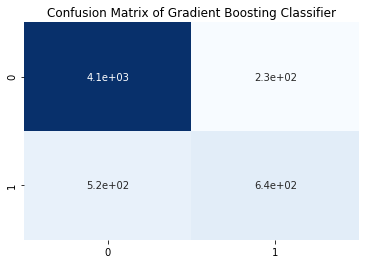

In [206]:
#Plotting confusion matrix for Grdient Boosting Classifier
cm=confusion_matrix(y_test, predgbc)
sns.heatmap(cm, annot=True, cbar=False, cmap='Blues')

plt.title("Confusion Matrix of Gradient Boosting Classifier")
plt.show()

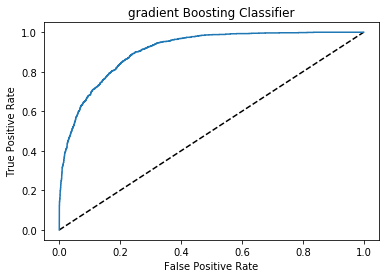

0.7495751000338736


In [209]:
#AUC ROC curve and finding the auc score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('gradient Boosting Classifier')
plt.show()

auc_score=roc_auc_score(y_test, predgbc)
print(auc_score)

In [210]:
#Saving the model

from sklearn.externals import joblib

#save the models as a pickle in a file
joblib.dump(gbc, 'Adult_income_gbc.pkl')

['Adult_income_gbc.pkl']